In [79]:
import pandas as pd

In [80]:
# Importing the dataset
epl = pd.read_csv("Project_13803342/dataframed_cleaned/epl_data_matches_copy.csv")

In [81]:
# Creating lists of different features

all_both = ["xga","xg","sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x", "sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y","poss" ,"poss_y" ,"succ%_x" ,"cpa_x", "succ%_y", "cpa_y" ,"kp", "1/3" ,"ppa" ,"crspa" ,"prog", "sca_x", "passlive_x" ,"to_x" ,"sca_y" ,"venue_code" ,"opp_code", "hour", "day_code", "referee_code" ,"formation_code", "captain_code", "tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x", "int_x", "err_x", "tkl_y",  "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y","int_y", "err_y"
]
both_shooting = ["sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x", "sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y"]
team_shooting = ["sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x"]
opp_shooting = ["sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y"]
both_possession = ["poss" ,"poss_y" ,"succ%_x" ,"cpa_x", "succ%_y", "cpa_y"]
team_possession = ["poss","succ%_x","cpa_x","1/3"]
opp_possession = ["poss_y","succ%_y","cpa_y"]
team_creation = ["sca_x", "passlive_x" ,"to_x"]
both_def = ["tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x", "sh_x", "int_x", "err_x", "tkl_y", "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y", "sh_y", "int_y", "err_y"]
team_def = ["tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x", "sh_x", "int_x", "err_x"]
opp_def = ["tkl_y", "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y", "sh_y", "int_y", "err_y"]
important = [ "xga", "xg","sot_x", "sot_y", "sh_x", "dist_x", "tkl%_x", "dist_y", "sh_y", "succ%_y", "tkl%_y", "poss_x", "succ%_x", "captain_code", "1/3", "opp_code"]
epl = epl.drop(columns = "target")

f1 = all_both 
f2 = both_shooting
f3 = team_shooting
f4 = opp_shooting 
f5 = both_possession
f6 = team_possession 
f7 = opp_possession 
f8 = team_creation
f9 = both_def 
f10 = team_def 
f11 = opp_def

In [82]:
import pandas as pd


# Defining the columns to normalise
columns_to_normalise = ['xga', 'xg', 'sh_x', 'sot_x', 'dist_x', 'fk_x', 'pk_x', 'pkatt_x', 'sh_y', 'sot_y', 'dist_y', 'fk_y', 'pk_y', 'pkatt_y', 'poss_x', 'poss_y', 'succ%_x', 'cpa_x', 'succ%_y', 'cpa_y', 'kp', '1/3', 'ppa', 'crspa', 'prog', 'sca_x', 'passlive_x', 'to_x', 'sca_y', 'venue_code', 'opp_code', 'hour', 'day_code', 'referee_code', 'formation_code', 'captain_code', 'tkl_x', 'tklw_x', 'def 3rd_x', 'tkl%_x', 'blocks_x','int_x', 'err_x', 'tkl_y', 'tklw_y', 'def 3rd_y', 'tkl%_y', 'blocks_y', 'int_y', 'err_y']

# Creating a min-max normalisation function
def min_max_normalisation(column):
    return (column - column.min()) / (column.max() - column.min())

# Applying a min-max normalisation to selected columns
normalised_data = epl[columns_to_normalise].apply(min_max_normalisation)

# Appending the normalised columns with the original dataframe
epl_normalised = pd.concat([epl.drop(columns=columns_to_normalise), normalised_data], axis=1)

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# list of the different features
features = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11]

x = epl.drop('result', axis=1)  # Features
y = epl['result']  # Target variable

# Split data into initial training/validation and testing sets (80/20 split)
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.3, random_state=42)

# Initialising an empty dictionary to store results
results = {}

# Looping through each feature and testing out the model
for i, feature in enumerate(features, 1):
    # Selecting the current feature
    x_train_current = x_train[feature]
    x_val_current = x_val[feature]
    
    # Intialising a Decision Tree
    trees = DecisionTreeClassifier()
    
    # Training the model on the training data
    trees.fit(x_train_current, y_train)
    
    # Evaluating the model's performance on the testing data
    y_pred = trees.predict(x_val_current)
    accuracy1 = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    
    # Storing the results in the dictionary
    results[f'f{i}'] = {'accuracy': accuracy1, 'classification_report': report}

# Printing out the results
print("Feature with the highest accuracy:")
max_accuracy_feature = max(results, key=lambda x: results[x]['accuracy'])
print(max_accuracy_feature)
print("Accuracy:", results[max_accuracy_feature]['accuracy'])

for key, value in results.items():
    print(f"Feature {key}:")
    print(f"Accuracy: {value['accuracy']}")
    print("Classification Report:")
    report_df = pd.DataFrame(value['classification_report']).transpose()
    print(report_df)

Feature with the highest accuracy:
f2
Accuracy: 0.49047619047619045
Feature f1:
Accuracy: 0.4587301587301587
Classification Report:
              precision    recall  f1-score    support
D              0.255639  0.239437  0.247273  142.00000
L              0.491803  0.510638  0.501044  235.00000
W              0.533597  0.533597  0.533597  253.00000
accuracy       0.458730  0.458730  0.458730    0.45873
macro avg      0.427013  0.427891  0.427304  630.00000
weighted avg   0.455356  0.458730  0.456918  630.00000
Feature f2:
Accuracy: 0.49047619047619045
Classification Report:
              precision    recall  f1-score     support
D              0.281046  0.302817  0.291525  142.000000
L              0.555066  0.536170  0.545455  235.000000
W              0.560000  0.553360  0.556660  253.000000
accuracy       0.490476  0.490476  0.490476    0.490476
macro avg      0.465371  0.464116  0.464547  630.000000
weighted avg   0.495284  0.490476  0.492720  630.000000
Feature f3:
Accuracy: 0.41

In [86]:
# Printing out the results
print("Feature with the highest accuracy:")
max_accuracy_feature = max(results, key=lambda x: results[x]['accuracy'])
print(max_accuracy_feature)
print("Accuracy:", results[max_accuracy_feature]['accuracy'])

Feature with the highest accuracy:
f2
Accuracy: 0.49047619047619045


In [85]:
#1 
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# Splitting data into features (x) and target (y)
x = epl[f2]
y = epl["result"]
ccp_alphas = [0.001, 0.002, 0.003,  0.1]  




# Defining a parameter grid for CV
param_grid = {
    'ccp_alpha': ccp_alphas, 
    'criterion': ['gini', 'entropy'],  # Criterion for splitting ('gini' for Gini impurity, 'entropy' for information gain)
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Initialising a Decision Tree 
dt = DecisionTreeClassifier(random_state=42)

# Splitting the into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialising GridSearchCV with Decision Tree classifier, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Results
cv_results1 = cross_val_score(best_model, x_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results1)
print("Mean Accuracy:", cv_results1.mean())


Best Hyperparameters: {'ccp_alpha': 0.002, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-Validation Results:
[0.61956522 0.61956522 0.54891304 0.58152174 0.61956522 0.58152174
 0.52459016 0.61748634 0.61748634 0.6284153 ]
Mean Accuracy: 0.5958630315989547


In [68]:
#2 Normalised
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


# Splitting data into features (x) and target (y)
x = epl_normalised[f2]
y = epl_normalised["result"]



# Defining a parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting ('gini' for Gini impurity, 'entropy' for information gain)
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Initialising Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Splitting the scaled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialising a GridSearchCV with Decision Tree classifier, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Result
cv_results_norm = cross_val_score(best_model, x_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_norm)
print("Mean Accuracy:", cv_results_norm.mean())

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Cross-Validation Results:
[0.5326087  0.53804348 0.5326087  0.5326087  0.56521739 0.47826087
 0.46994536 0.53005464 0.57377049 0.61748634]
Mean Accuracy: 0.5370604656688049


In [69]:
#3 Balanced w-SMOTE 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from imblearn.over_sampling import SMOTE


# Splitting data into features (x) and target (y)
x = epl[f2]
y = epl["result"]
 




# Defining a parameter grid
param_grid = { 
    'criterion': ['gini', 'entropy'],  # Criterion for splitting ('gini' for Gini impurity, 'entropy' for information gain)
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Initialising KNN classifier
dt = DecisionTreeClassifier()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Initialising GridSearchCV with KNN classifier, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search.fit(x_train_resampled, y_train_resampled)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Result
cv_results_smote = cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_smote)
print("Mean Accuracy:", cv_results_smote.mean())



Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-Validation Results:
[0.53571429 0.48660714 0.49553571 0.52678571 0.52678571 0.58035714
 0.59821429 0.61160714 0.67264574 0.61883408]
Mean Accuracy: 0.5653086963484946


In [70]:
#4 Balanced w-SMOTE (normalised)
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from imblearn.over_sampling import SMOTE


# Splitting data into features (x) and target (y)
x = epl_normalised[f2]
y = epl_normalised["result"]

# Defining a parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting ('gini' for Gini impurity, 'entropy' for information gain)
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Initialising KNN classifier
dt = DecisionTreeClassifier()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Initialising GridSearchCV with KNN classifier, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search.fit(x_train_resampled, y_train_resampled)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Result
cv_results_smote_norm = cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_smote_norm)
print("Mean Accuracy:", cv_results_smote_norm.mean())

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cross-Validation Results:
[0.51339286 0.47767857 0.49107143 0.54464286 0.51339286 0.52232143
 0.56696429 0.67410714 0.64573991 0.69058296]
Mean Accuracy: 0.5639894298526585


In [71]:
# Returning the results of the Cross-Validation
print("Accuracy of unbalanced dataset: ")
print("Unnormalised", cv_results1.mean())
print("Normalised",cv_results_norm.mean())
print("\nAccuracy of balanced dataset with SMOTE: ")
print("Unnormalised" , cv_results_smote.mean())
print("Normalised",cv_results_smote_norm.mean())

Accuracy of unbalanced dataset: 
Unnormalised 0.5958630315989547
Normalised 0.5370604656688049

Accuracy of balanced dataset with SMOTE: 
Unnormalised 0.5653086963484946
Normalised 0.5639894298526585


In [72]:

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)



accuracy = accuracy_score(y_test,pred)
print(accuracy)
report = classification_report(y_test,pred)
print(report)
# Generating a confusion matrix
conf_matrix = confusion_matrix(y_test,pred)
print("Confusion Matrix:")
print(conf_matrix)



0.5108005082592122
              precision    recall  f1-score   support

           D       0.30      0.28      0.29       184
           L       0.55      0.54      0.55       287
           W       0.58      0.62      0.60       316

    accuracy                           0.51       787
   macro avg       0.48      0.48      0.48       787
weighted avg       0.51      0.51      0.51       787

Confusion Matrix:
[[ 51  57  76]
 [ 66 156  65]
 [ 52  69 195]]


In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

x = epl_normalised[f2]
y = epl_normalised["result"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Defining the range of ccp_alpha values to explore

ccp_alphas = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]  # Adjust the range as needed

# Defining the parameter grid including ccp_alpha
param_grid = {
    'ccp_alpha': ccp_alphas,
    'criterion': ['gini', 'entropy'],  # Add other parameters as needed
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialising Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialising GridSearchCV with Decision Tree classifier and parameter grid
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, scoring='accuracy')

# Performing grid search
grid_search.fit(x_train, y_train)

# Getting the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Evaluating the best model on the test set
test_accuracy = best_model.score(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'ccp_alpha': 0.002, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.5819567979669632


Accuracy: 0.5730622617534943
Classification Report:
              precision    recall  f1-score   support

           D       0.30      0.28      0.29       184
           L       0.55      0.54      0.55       287
           W       0.58      0.62      0.60       316

    accuracy                           0.51       787
   macro avg       0.48      0.48      0.48       787
weighted avg       0.51      0.51      0.51       787

Confusion Matrix:
[[ 24  69  91]
 [ 30 183  74]
 [ 22  50 244]]


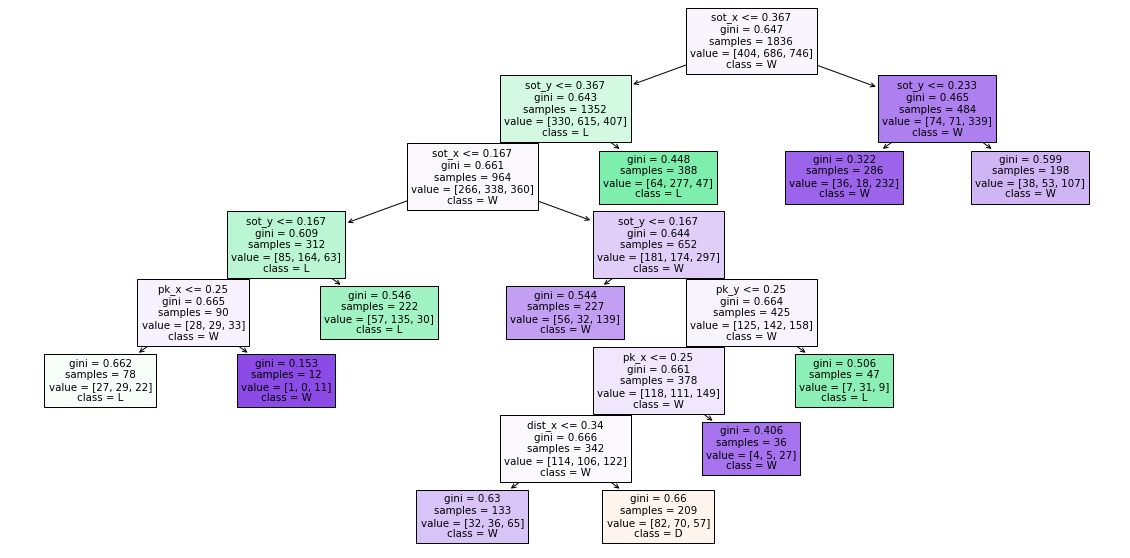

In [74]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


x = epl_normalised[f2]
y = epl_normalised["result"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

bp =  {'ccp_alpha': 0.003, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Training a Decision Tree Classifier with pruning
dt = DecisionTreeClassifier(**bp)  
dt.fit(x_train, y_train)

# Prediction on the test set
pred = dt.predict(x_test)

# Calculaing accuracy
final_accuracy = accuracy_score(y_test, pred)
print("Accuracy:", final_accuracy)

# Generating classification report
final_report = classification_report(y_test, pred)
print("Classification Report:")
print(report)

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=x.columns, class_names=dt.classes_)
plt.show()

Some of the code from the heatmap below was extracted from kaggle.
- sns heatmaps

'https://www.kaggle.com/code/alkanerturan/stroke-prediction-smote-gridsearch-model-comp'

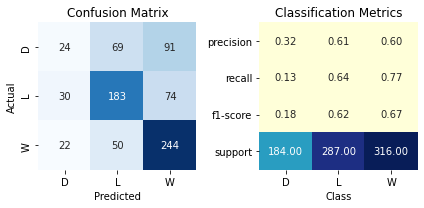

0.5061089185665958 : is the precision score
0.5134057811212597 : is the recall score
0.49303700768134934 : is the f1 score
Highest accuracy score for Decision Tree w Pruning: 
58.2


In [76]:
##### 
import seaborn as sns
class_names = ["D", "L","W"]
report = classification_report(y_test, pred, target_names=class_names, output_dict=True)

# Set up plot size and style
plt.figure(figsize=(6, 3))

# Plot confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True,cbar=False, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot classification report heatmap
plt.subplot(1, 2, 2)
sns.heatmap(np.array([[report[label][metric] for label in class_names] for metric in report[class_names[0]]]),
            annot=True, cbar=False,fmt=".2f", cmap="YlGnBu", xticklabels=class_names, yticklabels=report[class_names[0]].keys())

plt.xticks(rotation=0)
plt.yticks(rotation=0)
#plt.ylabel("Metrics")
plt.xlabel("Class")
plt.title("Classification Metrics")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

print(precision_score(y_test, pred, average='macro'), ": is the precision score")
print(recall_score(y_test, pred, average='macro'), ": is the recall score")
print(f1_score(y_test, pred, average='macro'), ": is the f1 score")

best = test_accuracy * 100
print("Highest accuracy score for Decision Tree w Pruning: ")
print(round(best,2))